In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.shape

(144, 2)

In [ ]:
print(df.dtypes)

Month         object
Passengers     int64
dtype: object


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [ ]:
df.set_index('Month',inplace=True)

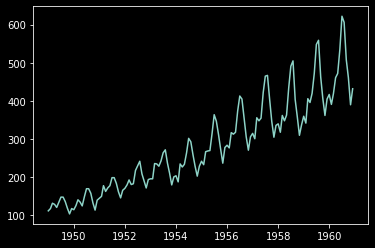

In [ ]:
plt.plot(df['Passengers'])

#Dicky fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df['Passengers'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.9918802434376409  if above 0.05, data is not stationary


#Extract & plot trend seasonal and residual

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposed = seasonal_decompose(df['Passengers'],model='additive')

In [ ]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

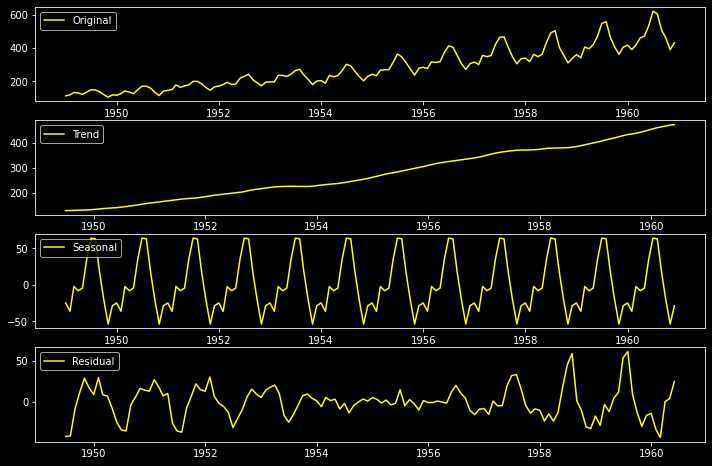

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

#Arima model

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model = auto_arima(df['Passengers'], start_p=1, d=1, start_q=1,
                         max_p=5, max_q=5,max_d=5,m=12,
                         start_P=0, D=1, start_Q=0, max_P=5, max_Q=5, max_D=5,
                         seasonal=True,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         step_wise=True,n_fits=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.38 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.49 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.28 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.57 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.73 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [ ]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 21 Aug 2021   AIC                           1019.178
Time:                                     16:55:14   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

#model: SARIMAX (0,1,1)(2,1,0)

In [ ]:
size = int(len(df) * 0.66)

In [ ]:
X_train,X_test = df[0:size],df[size:len(df)]

In [ ]:
X_train.shape

(95, 1)

In [ ]:
X_test.shape

(49, 1)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model =SARIMAX(X_train['Passengers'], order=(0,1,1),seasonal_order=(2,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
result = model.fit()

In [ ]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Sat, 21 Aug 2021   AIC                            610.538
Time:                                    17:05:54   BIC                            622.572
Sample:                                01-01-1949   HQIC                           615.369
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3206      0.102     -3.155      0.002      -0.520      -0.121
ar.S.L12       0.6847      0.650   

#Train Prediction

In [ ]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index,end_index)

In [ ]:
train_prediction.head(6)

1949-01-01      0.000000
1949-02-01    111.998297
1949-03-01    117.999818
1949-04-01    131.999574
1949-05-01    129.000091
1949-06-01    121.000243
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
X_train.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#Prediction for next few months

In [ ]:
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index,end_index).rename('Predicted Passengers')

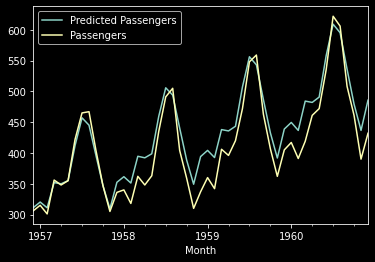

In [ ]:
prediction.plot(legend= True)
X_test['Passengers'].plot(legend= True)

In [ ]:
X_test.head()

,Passengers
Month,
1956-12-01,306
1957-01-01,315
1957-02-01,301
1957-03-01,356
1957-04-01,348


In [ ]:
prediction.head()

1956-12-01    311.118326
1957-01-01    320.269216
1957-02-01    310.950224
1957-03-01    351.863246
1957-04-01    349.886617
Freq: MS, Name: Predicted Passengers, dtype: float64

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore = math.sqrt(mean_squared_error(X_train,train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 16.14 RMSE


In [ ]:
testScore = math.sqrt(mean_squared_error(X_test,prediction))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 29.48 RMSE


#Forecasting

In [ ]:
forecast = result.predict(start=len(df),
                          end =(len(df)-1) + 3 * 12,
                          typ='levels').rename('Forecast')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


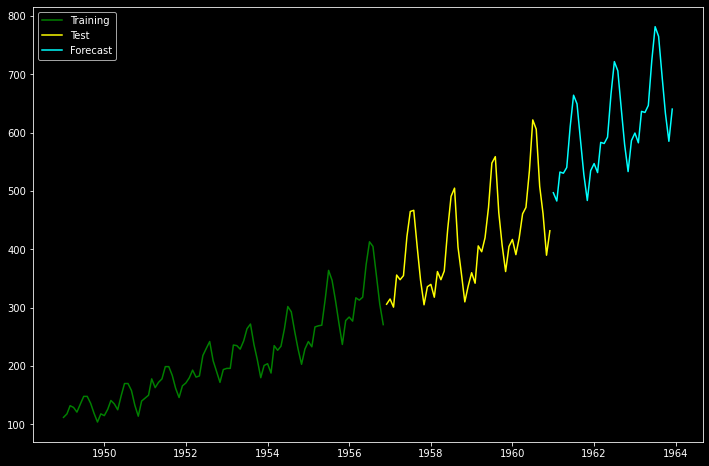

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='Left corner')
plt.show()